In [1]:
# Required imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans

## Load the Data Into a Pandas DataFrame

In [2]:
# Read in the CSV file as a Pandas Dataframe
ccinfo_default_df = pd.read_csv(
    Path("../Resources/ccinfo_transformed_no_dummies_only_cust_segm.csv")
)

ccinfo_default_df.head()

,limit_bal,age,bill_amt,pay_amt,customer_segments
0,-1.117341,24,-0.660703,-0.542779,2
1,-0.349942,26,-0.636370,-0.463994,2
2,-0.580162,34,-0.416808,-0.354013,0
3,-0.887121,37,-0.080152,-0.402077,0
4,-0.887121,57,-0.396855,0.523771,1


In [3]:
# Plot the clusters using the "limit_bal" and "age" columns
ccinfo_default_df.hvplot.scatter(
    x="limit_bal",
    y="age",
    by="customer_segments"
)

:NdOverlay   [customer_segments]
   :Scatter   [limit_bal]   (age)

In [4]:
# Plot the clusters using the "bill_amt" and "pay_amt" columns
ccinfo_default_df.hvplot.scatter(
    x="bill_amt",
    y="pay_amt",
    by="customer_segments"
)

:NdOverlay   [customer_segments]
   :Scatter   [bill_amt]   (pay_amt)

## Use PCA to reduce the number of factors 

In [5]:
# Remove the Customer Segments variable, add inplace=True
ccinfo_default_df.drop(columns="customer_segments", inplace=True)

In [6]:
ccinfo_default_df

,limit_bal,age,bill_amt,pay_amt
0,-1.117341,24,-0.660703,-0.542779
1,-0.349942,26,-0.636370,-0.463994
2,-0.580162,34,-0.416808,-0.354013
3,-0.887121,37,-0.080152,-0.402077
4,-0.887121,57,-0.396855,0.523771
...,...,...,...,...
4994,-1.117341,36,-0.392558,-0.422089
4995,0.110497,34,-0.589218,-0.152107
4996,0.263977,45,1.115249,-0.163492
4997,1.108115,44,3.338132,0.760455


In [7]:
# Import Stadardscaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [8]:
# Use the StandardScaler module and fit_transform function to 
# scale all columns with numerical values
#ccinfo_default_df.loc[:,'age'] = StandardScaler().fit_transform(ccinfo_default_df[['age']])
ccinfo_default_lst = StandardScaler().fit_transform(ccinfo_default_df)
ccinfo_default_lst

array([[-1.1173411 , -1.22679159, -0.66070266, -0.5427793 ],
       [-0.3499424 , -1.01094155, -0.63637003, -0.46399421],
       [-0.58016201, -0.14754142, -0.41680786, -0.35401308],
       ...,
       [ 0.26397655,  1.03963376,  1.1152494 , -0.16349243],
       [ 1.10811512,  0.93170874,  3.33813208,  0.76045505],
       [-0.04298292,  0.50000868, -0.66917611, -0.4872953 ]])

In [9]:
# Create a DataFrame called with the scaled data
# The column names should match those referenced in the StandardScaler step
ccinfo_default_df_scaled = pd.DataFrame(
    ccinfo_default_lst,
    columns=["limit_bal", "age", "bill_amt", "pay_amt"])
ccinfo_default_df_scaled.head()

,limit_bal,age,bill_amt,pay_amt
0,-1.117341,-1.226792,-0.660703,-0.542779
1,-0.349942,-1.010942,-0.636370,-0.463994
2,-0.580162,-0.147541,-0.416808,-0.354013
3,-0.887121,0.176234,-0.080152,-0.402077
4,-0.887121,2.334734,-0.396855,0.523771


In [10]:
# Import the PCA module
from sklearn.decomposition import PCA

In [19]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)

In [20]:
# Fit the PCA model on the transformed credit card DataFrame
ccinfo_pca = pca.fit_transform(ccinfo_default_df)
# Review the first 5 rows of list data
ccinfo_pca[:5]


array([[-11.39374532,  -1.11578252],
       [ -9.37955678,  -0.65786695],
       [ -1.38301701,  -0.75048925],
       [  1.61282554,  -0.82015925],
       [ 21.61349307,  -0.82424692]])

## PCA explained variance ratio

In [21]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.96665303, 0.01914715])

## Creating the PCA DataFrame

In [22]:
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(ccinfo_pca, columns=["PCA1", "PCA2"])

# Review the PCA DataFrame
ccinfo_pca_df


,PCA1,PCA2
0,-11.393745,-1.115783
1,-9.379557,-0.657867
2,-1.383017,-0.750489
3,1.612826,-0.820159
4,21.613493,-0.824247
...,...,...
4994,0.606499,-1.120094
4995,-1.370209,-0.335375
4996,9.642270,0.498435
4997,8.680944,2.805327


### Display the weights across each PCA and columns reduced

In [24]:
import numpy as np

#Get the absolute values of the PCA Components
pca_components_abs = np.abs(pca.components_)
pca_components_abs
#create a datafram that represent the weights of each columns in each principal component
pca_weights_df = pd.DataFrame(pca_components_abs, columns=ccinfo_default_df.columns, index = ['PCA1','PCA2'])
pca_weights_df

,limit_bal,age,bill_amt,pay_amt
PCA1,0.018021,0.999781,0.007167,0.007912
PCA2,0.566803,0.019010,0.564838,0.599442


In [25]:
# Assuming pca_weights_df is your DataFrame containing weights
heatmap = pca_weights_df.hvplot.heatmap(
    xlabel='Features', 
    ylabel='Principal Components',
    title='Weights of Original Features in Principal Components',
    cmap='coolwarm',
    width=700,
    height=500
)

heatmap


:HeatMap   [columns,index]   (value)

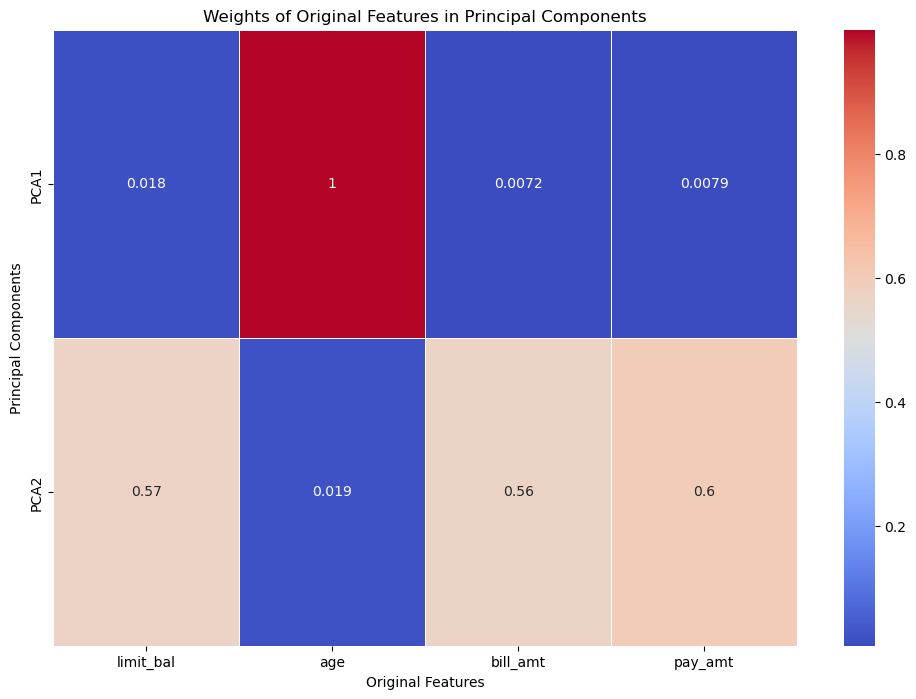

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the heatmap
# sns.set(style="whitegrid")

# Create a heatmap of the PCA weights
plt.figure(figsize=(12, 8))
sns.heatmap(pca_weights_df, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Weights of Original Features in Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

## Incorporating the PCA DataFrame into the elbow method

In [27]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(ccinfo_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()


,k,inertia
0,1,437869.195089
1,2,141639.613200
2,3,72111.650387
3,4,51726.474368
4,5,34740.924849


In [28]:
# Plot the Elbow Curve
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

## Segmention of the PCA data with Kmeans 

In [29]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=1)
# Fit the model
model.fit(ccinfo_pca_df)

# Make predictions
k_3 = model.predict(ccinfo_pca_df)

# Create a copy of the PCA DataFrame
ccinfo_pca_predictions_df = ccinfo_pca_df.copy()

# Add a class column with the labels
ccinfo_pca_predictions_df['customer_segments'] = k_3
ccinfo_pca_predictions_df


,PCA1,PCA2,customer_segments
0,-11.393745,-1.115783,0
1,-9.379557,-0.657867,0
2,-1.383017,-0.750489,2
3,1.612826,-0.820159,2
4,21.613493,-0.824247,1
...,...,...,...
4994,0.606499,-1.120094,2
4995,-1.370209,-0.335375,2
4996,9.642270,0.498435,1
4997,8.680944,2.805327,2


In [ ]:
# Plot the clusters
